# Communicate-Data-Finding-Exploration-with-Ford-GoBike-System-Data
## Gunja Chotai

## Table of Contents
- [Preliminary Wrangling](#wrangling)
- [Structure of dataset](#dataset)
- [Univariate Exploration and Analysis](#univariate)
- [Bivariate Exploration and Analysis](#bivariate)
- [Multivariate Exploration and Analysis](#multivariate)


<a id='wrangling'></a>
## Preliminary Wrangling

 - I chose Ford GoBike System Data : https://www.fordgobike.com/system-data as my source data
 - This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.
 - Multiple data files will need to be joined together if a full year’s coverage is desired.
 - The features included in the dataset : Trip Duration (seconds) , Start Time and Date , End Time and Date , Start Station ID , Start Station Name , Start Station Latitude , Start Station Longitude , End Station ID , End Station Name, End Station Latitude , End Station Longitude , Bike ID , User Type (Subscriber or Customer – “Subscriber” = Member or “Customer” = Casual) , Member Year of Birth, Member Gender

In [9]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import os
import zipfile as zf

%matplotlib inline

In [10]:
# here source files seems like csv.zip but can actually be read in just like csv files
#zf = zipfile.ZipFile('C:/Users/Desktop/THEZIPFILE.zip') 
#df = pd.read_csv(zf.open('intfile.csv'))
# do not need to unzip 

# create the path and get the name list under the path 
curDir = os.getcwd()
path = curDir+'/fordgobike/'
text_files = os.listdir(path)
#text_files

# build the frame df by appending each file
file_list = []
print ("reading data... ")
for text_file in text_files:
    #print(text_file)
    filename = path+text_file
    #print(filename)
    df = pd.read_csv(filename)
    file_list.append(df)
df_bike = pd.concat(file_list) 
df =  df_bike.copy()   
df.shape

reading data... 


(1863721, 14)

In [11]:
df.head(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip
0,75284,2018-01-31 22:52:35.2390,2018-02-01 19:47:19.8240,120.0,Mission Dolores Park,37.761420,-122.426435,285.0,Webster St at O'Farrell St,37.783521,-122.431158,2765,Subscriber,No
1,85422,2018-01-31 16:13:34.3510,2018-02-01 15:57:17.3100,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,2815,Customer,No
2,71576,2018-01-31 14:23:55.8890,2018-02-01 10:16:52.1160,304.0,Jackson St at 5th St,37.348759,-121.894798,296.0,5th St at Virginia St,37.325998,-121.877120,3039,Customer,No
3,61076,2018-01-31 14:53:23.5620,2018-02-01 07:51:20.5000,75.0,Market St at Franklin St,37.773793,-122.421239,47.0,4th St at Harrison St,37.780955,-122.399749,321,Customer,No
4,39966,2018-01-31 19:52:24.6670,2018-02-01 06:58:31.0530,74.0,Laguna St at Hayes St,37.776435,-122.426244,19.0,Post St at Kearny St,37.788975,-122.403452,617,Subscriber,No
5,6477,2018-01-31 22:58:44.8670,2018-02-01 00:46:41.9080,236.0,Market St at 8th St,37.803686,-122.282497,160.0,West Oakland BART Station,37.805318,-122.294837,1306,Customer,No
6,453,2018-01-31 23:53:53.6320,2018-02-01 00:01:26.8050,110.0,17th & Folsom Street Park (17th St at Folsom St),37.763708,-122.415204,134.0,Valencia St at 24th St,37.752428,-122.420628,3571,Subscriber,No
7,180,2018-01-31 23:52:09.9030,2018-01-31 23:55:10.8070,81.0,Berry St at 4th St,37.775880,-122.393170,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,1403,Subscriber,No
8,996,2018-01-31 23:34:56.0040,2018-01-31 23:51:32.6740,134.0,Valencia St at 24th St,37.752428,-122.420628,4.0,Cyril Magnin St at Ellis St,37.785881,-122.408915,3675,Subscriber,Yes
9,825,2018-01-31 23:34:14.0270,2018-01-31 23:47:59.8090,305.0,Ryland Park,37.342725,-121.895617,317.0,San Salvador St at 9th St,37.333955,-121.877349,1453,Subscriber,Yes


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1863721 entries, 0 to 131362
Data columns (total 14 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   duration_sec             int64  
 1   start_time               object 
 2   end_time                 object 
 3   start_station_id         float64
 4   start_station_name       object 
 5   start_station_latitude   float64
 6   start_station_longitude  float64
 7   end_station_id           float64
 8   end_station_name         object 
 9   end_station_latitude     float64
 10  end_station_longitude    float64
 11  bike_id                  int64  
 12  user_type                object 
 13  bike_share_for_all_trip  object 
dtypes: float64(6), int64(2), object(6)
memory usage: 213.3+ MB


In [13]:
df.dtypes

duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
bike_share_for_all_trip     object
dtype: object

In [14]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id
count,1.863721e+06,1.851950e+06,1.863721e+06,1.863721e+06,1.851950e+06,1.863721e+06,1.863721e+06,1.863721e+06
mean,8.573026e+02,1.196744e+02,3.776678e+01,-1.223492e+02,1.181730e+02,3.776690e+01,-1.223487e+02,2.296851e+03
std,2.370379e+03,1.003976e+02,1.057689e-01,1.654634e-01,1.004403e+02,1.056483e-01,1.650597e-01,1.287733e+03
min,6.100000e+01,3.000000e+00,3.726331e+01,-1.224737e+02,3.000000e+00,3.726331e+01,-1.224737e+02,1.100000e+01
25%,3.500000e+02,3.300000e+01,3.777106e+01,-1.224114e+02,3.000000e+01,3.777106e+01,-1.224094e+02,1.225000e+03
50%,5.560000e+02,8.900000e+01,3.778107e+01,-1.223974e+02,8.800000e+01,3.778127e+01,-1.223971e+02,2.338000e+03
75%,8.720000e+02,1.860000e+02,3.779625e+01,-1.222865e+02,1.830000e+02,3.779728e+01,-1.222894e+02,3.333000e+03
max,8.636600e+04,3.810000e+02,4.551000e+01,-7.357000e+01,3.810000e+02,4.551000e+01,-7.357000e+01,6.234000e+03


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1863721 entries, 0 to 131362
Data columns (total 14 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   duration_sec             int64  
 1   start_time               object 
 2   end_time                 object 
 3   start_station_id         float64
 4   start_station_name       object 
 5   start_station_latitude   float64
 6   start_station_longitude  float64
 7   end_station_id           float64
 8   end_station_name         object 
 9   end_station_latitude     float64
 10  end_station_longitude    float64
 11  bike_id                  int64  
 12  user_type                object 
 13  bike_share_for_all_trip  object 
dtypes: float64(6), int64(2), object(6)
memory usage: 213.3+ MB


In [16]:
# change the data type for start and end time to be datetime64[ns]
df.start_time = pd.to_datetime(df.start_time)
df.end_time = pd.to_datetime(df.end_time)

<a id='dataset'></a>
### What is the structure of your dataset?

There are 186372 data trips for fordgobike in the dataset with 14 features (duration_sec, start_time, end_time, start_station_id, start_station_name, start_station_latitude, start_station_longitude, end_station_id, end_station_name, end_station_latitude ,end_station_longitude, bike_id, user_type, bike_share_for_all_trip). Most variables are 6 numerical, and others are 2 datetime and 6 object type.

### What is/are the main feature(s) of interest in your dataset?

I'm most interested in figuring out how trip duration is dependent on other features such as: start month, duration, and user_type from the dataset.


### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I expect that trip duration will have the strongest effect on each the start stations and end stations becouse the crowded places should receive more rides. I also think that user_type will have effects on trip duration.

<a id='univariate'></a>
## Univariate Exploration

> I'll start by looking at the distribution of the main variable of interest: duration_sec.

Question 1 : I want to know is "What is the distribution of trip duration?"

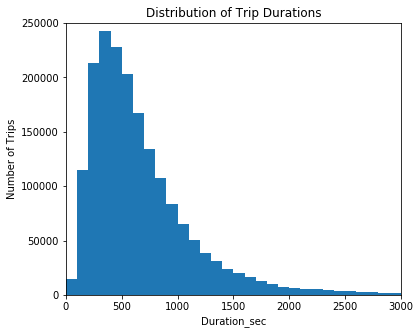

In [17]:
bins = np.arange(0, df['duration_sec'].max() + 100, 100)
plt.figure(figsize=[6, 5])
plt.hist(data = df, x = 'duration_sec', bins = bins);
plt.title('Distribution of Trip Durations')
plt.xlabel('Duration_sec')
plt.ylabel('Number of Trips')
plt.axis([0, 3000, 0, 250000])
plt.show()

> It is right screwed with a long tail on the right. I am going to add log transformation to x axis. <br/> <br/>
It is really difficult to look at the plot. I had to increase the bin width to 100 to let the plot show. Now i am measuring trip convert seconds data in to log transformation .

Text(0, 0.5, 'Frequency')

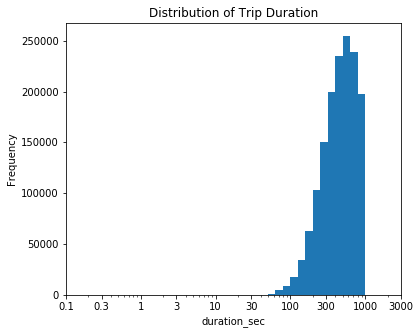

In [18]:
bin_edges = 10**np.arange(0 , 3+0.1 , 0.1)
ticks =  [ 0.1 , 0.3 , 1 , 3, 10, 30, 100, 300,1000,3000]
labels = ['{}'.format(v) for v in ticks]
plt.figure(figsize=[6, 5])
plt.hist(data = df , x = 'duration_sec' , bins = bin_edges);
plt.xticks(ticks,labels);
plt.xlabel('duration_sec');
plt.xscale('log');
plt.xticks(ticks,labels);
plt.title('Distribution of Trip Duration')
plt.ylabel('Frequency')

> We can see from the distribution , the trip duration of most users is about 10 mins

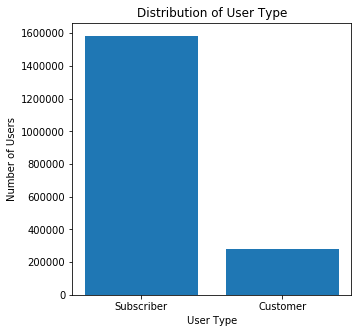

In [19]:
# plotting types of users
plt.figure(figsize=[5,5])
plt.bar(x = df.user_type.value_counts().keys(),height=df.user_type.value_counts());
plt.title('Distribution of User Type')
plt.xlabel('User Type')
plt.ylabel('Number of Users')
plt.show()

> Here we can see most of the people prefer to take subscription. From above data in 2018 we can say that 500 time more subscriber use bike service comapre to customer.

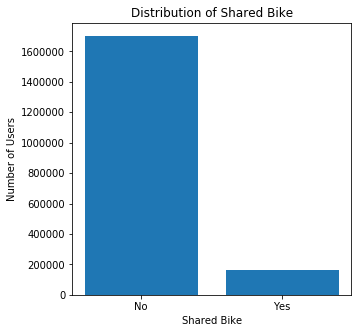

In [20]:
# plotting types of users
plt.figure(figsize=[5,5])
plt.bar(x = df.bike_share_for_all_trip.value_counts().keys(),height=df.bike_share_for_all_trip.value_counts());
plt.title('Distribution of Shared Bike')
plt.xlabel('Shared Bike')
plt.ylabel('Number of Users')
plt.show()

> From above chart we can predict that mostly people dont prefer shared bike trip. They can enjoy their own comapny.

<a id='bivariate'></a>
## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

In [21]:
# some data engineering should be conducted: 
# create month_start column by extracting months of start_time 
df['month_start'] = pd.DatetimeIndex(df['start_time']).month
df['month_start'].value_counts()

10    201458
7     199222
6     195968
8     192162
9     186217
5     179125
11    134135
12    131363
4     131169
3     111382
2     106718
1      94802
Name: month_start, dtype: int64

Question 2. Does weather(month) affect the trip duration

Text(0, 0.5, 'Trip Duration(sec)')

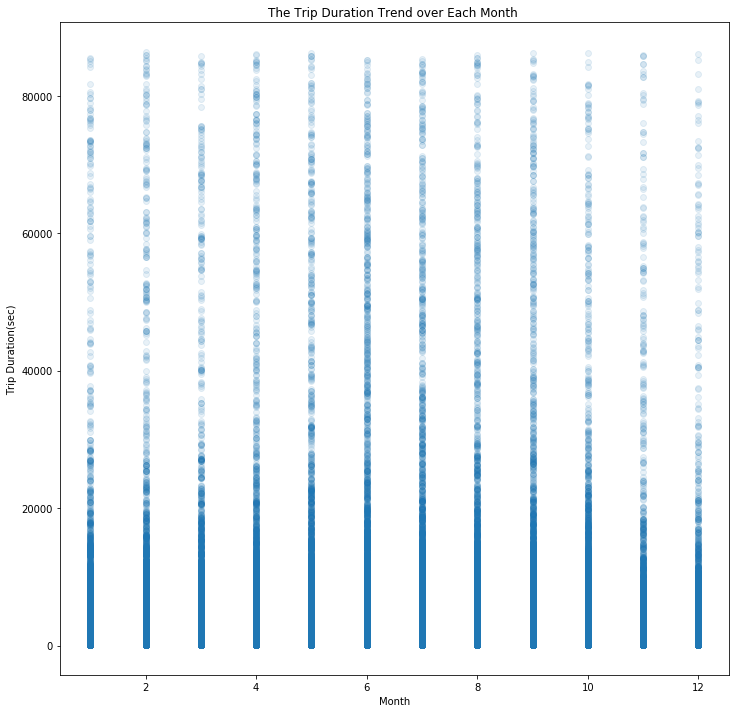

In [22]:
# We can check the trip duration over changes over each month.
plt.figure(figsize = [12,12]) # make the whole figure bigger to show all 
plt.scatter(data = df , x = 'month_start' , y = 'duration_sec' , alpha = 0.1 );
plt.title('The Trip Duration Trend over Each Month ')
plt.xlabel('Month')
plt.ylabel('Trip Duration(sec)')

June to Auguts in 2018 has the most duration. Other seasons do not have significant difference.

Question 3: Will weather(season) show a more obvious affect on trip duration ?

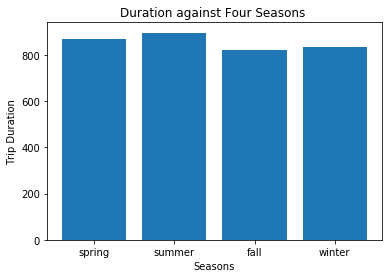

In [23]:
# Create 4 season categories
spring_dur = df.query('month_start in ["3" , "4" , "5"]' ).duration_sec.mean ()
summer_dur = df.query('month_start in ["6" , "7" , "8"] ').duration_sec.mean()
fall_dur = df.query('month_start in ["9" , "10" , "11"] ').duration_sec.mean()
winter_dur = df.query('month_start in ["12" , "1" , "2"]' ).duration_sec.mean()

# here the month must be double quote characters, otherwise, give me systax errors
plt.bar(['spring','summer','fall','winter'],[spring_dur , summer_dur , fall_dur , winter_dur] )
plt.title('Duration against Four Seasons ')
plt.xlabel('Seasons')
plt.ylabel('Trip Duration');


- As we expected, summer has the longest trip duration , with average above 14 mins.
- But there is no significant difference of trip duration in terms of four seasons. It is probably because the weather in San - Francisco bay area does not change that much.
- What surprised me the most is fall has the lowest trip duration in 2018. Fall is most likely to experience good weather with pleasant average temperatures in SF. People are more likely to go out and exercise .

What surprised me is that the lower mean trip durations occur in Fall. In terms of Fall, one reason could be that the air quality in fall 2018 SF was really bad, which prevented more people doing outdoor activities.

<a id='multivariate'></a>
## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

Question 4 : Does user type lead to the lower trip duration ?

C:\Users\Lenovo\miniconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


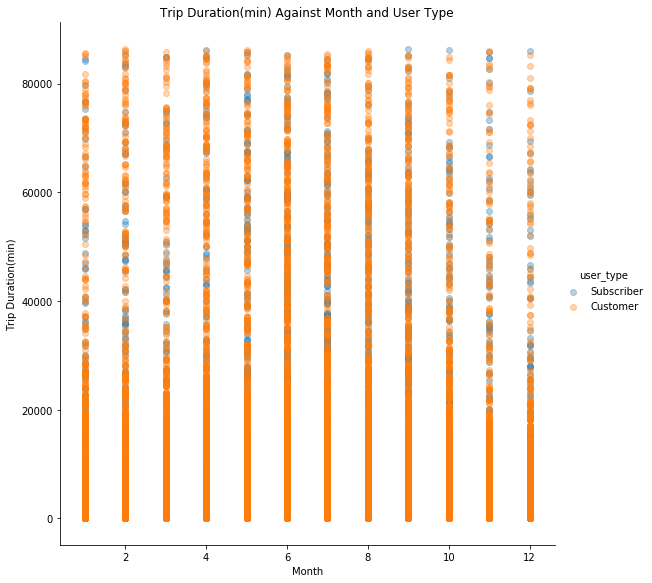

In [24]:
# I want to find out if user type lead to the lower trip duration 
g = sb.FacetGrid(data =  df, hue = 'user_type', size = 8)
g.map(plt.scatter, 'month_start','duration_sec', alpha = 1/3)
g.add_legend()
plt.title('Trip Duration(min) Against Month and User Type')
plt.xlabel('Month')
plt.ylabel('Trip Duration(min)');

> As we can see through the plot above, there are far more customers than subscribers. The user type does make an impact on trip duration.<br/>
An interesting point is that subscribers tend to rent the bikes for long trips, above 300 minutes.